# Linear regression

Import all the modules you will need in this notebook here:

In [1]:
# exercise 0
# Put your solution here!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# plots a line given an intercept and a slope
from statsmodels.graphics.regressionplots import abline_plot


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [2]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename

fname = get_path('fram.txt')
columns_ = ['ID', 'SEX', 'AGE', 'FRW', 'SBP', 'SBP10', 'DBP', 'CHOL', 'CIG', 'CHD', 'YRS_CHD', 'DEATH','YRS_DTH', 'CAUSE']
fram = pd.read_csv(fname, sep='\t', index_col=False, usecols=columns_)

fram.head()
fram.describe()
fram.describe

<bound method NDFrame.describe of         ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD YRS_CHD  DEATH  \
0     4988  female   57  135  186    NaN  120   150    0    1     pre      7   
1     3001  female   60  123  165    NaN  100   167   25    0      16     10   
2     5079  female   54  115  140    NaN   90   213    5    0       8      8   
3     5162  female   52  102  170    NaN  104   280   15    0      10      7   
4     4672  female   45   99  185    NaN  105   326   20    0       8     10   
...    ...     ...  ...  ...  ...    ...  ...   ...  ...  ...     ...    ...   
1389  4132    male   51  100  160    NaN   98   216   30    0      10      7   
1390  5418    male   50   95  174    NaN  106   192    5    0       8      8   
1391  6260    male   57   88  144    NaN   96   184   20    0       2      3   
1392  5786    male   62   87  156    NaN   90   255    0    0       6      5   
1393  6071    male   45   83  156    NaN   90   255   15    0       6      5   

     

In [58]:
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [3]:
# exercise 2
def rescale(s):
    return (s - s.mean()) / (2* s.std())

#sigma = s.std()
#center = (s.max()-s.min())/2 + s.min() 
#s = (s - center) / (2* s.std())

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [4]:
# exercise 3
# Put your solution here!
#Renormalize to ease interpretation of the model parameters
fram["sAGE"] = rescale(fram.AGE)
fram["sFRW"] = rescale(fram.FRW)
fram["sSBP"] = rescale(fram.SBP)
fram["sDBP"] = rescale(fram.DBP)
fram["sCHOL"] = rescale(fram.CHOL)
fram["sCIG"] = rescale(fram.CIG)
fram.describe()
# Note: No need to scale the variable SEX

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH,sAGE,sFRW,sSBP,sDBP,sCHOL,sCIG
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512,1.288623e-16,-1.162787e-17,-8.123583e-17,1.358435e-16,-3.038379e-17,-2.352733e-15
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000,-7.770703e-01,-1.503033e+00,-1.036435e+00,-1.410618e+00,-1.497122e+00,-3.465693e-01
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000,-4.633616e-01,-3.200998e-01,-3.227115e-01,-3.562285e-01,-3.741042e-01,-3.465693e-01
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000,-4.508343e-02,-6.661422e-02,-1.085945e-01,-4.765177e-03,-5.015684e-02,-3.465693e-01
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000,3.731948e-01,2.432015e-01,2.125810e-01,2.764055e-01,3.169835e-01,5.166802e-01
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000,1.000612e+00,3.285029e+00,2.710613e+00,2.455478e+00,2.109492e+00,2.243179e+00


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [64]:
# exercise 4
# Put your solution here!

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           4.13e-40
Time:                        12:54:18   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [65]:
# exercise 5
# Put your solution here!
fit = smf.ols('SBP ~ sFRW+SEX+sCHOL+sAGE', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           2.44e-46
Time:                        12:55:15   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Your solution here

The weight(sFRW) is the most important factor, and next is age(sAGE).

Try to add to the model all the interactions with other variables. 

In [237]:
# exercise 6
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + SEX:sCHOL + SEX:sAGE + sCHOL:sAGE', data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           4.92e-43
Time:                        21:05:07   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

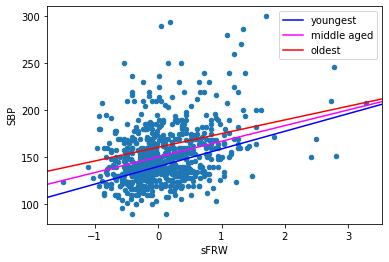

In [239]:
# exercise 7
# Put your solution here!

p=fit.params
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")
abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW - p["sFRW:sAGE"],ax=plt.gca(), color="blue", label="youngest")
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color="magenta", label="middle aged")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW + p["sFRW:sAGE"],ax=plt.gca(), color="red", label="oldest")
plt.legend();

How does the dependence of blood pressure on weight change as a person gets older?
***

Your solution here.

elderly peopls has higher SBP for whole weight range, but younger people blood pressure has more dependency on weight change,

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Wed, 22 Jul 2020   Prob (F-statistic):           2.99e-40
Time:                        21:18:06   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

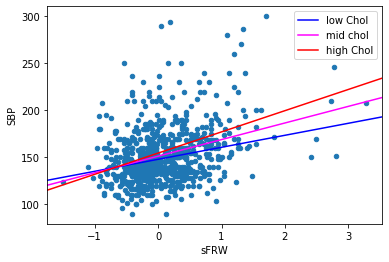

In [240]:
# exercise 8
# Put your solution here!
fit = smf.ols('SBP ~ sFRW + SEX + sCHOL + sAGE + sCIG+ sFRW:SEX + sFRW:sCHOL + sFRW:sAGE + sFRW:sCIG + SEX:sCHOL + SEX:sAGE + SEX:sCIG + sCHOL:sAGE + sCHOL:sCIG + sAGE:sCIG', data=fram).fit()
print(fit.summary())

p=fit.params
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p["sFRW:sCHOL"],ax=plt.gca(), color="blue", label="low Chol")
abline_plot(intercept=p.Intercept, slope=p.sFRW,ax=plt.gca(), color="magenta", label="mid chol")
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p["sFRW:sCHOL"],ax=plt.gca(), color="red", label="high Chol")
plt.legend();



How does the model and its accuracy look?

***

Your solution here.

***

# Logistic regression

In [95]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

In [260]:
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)
fram.HIGH_BP.astype('int64')
fram.HIGH_BP.head()

0    1
1    1
2    1
3    1
4    1
Name: HIGH_BP, dtype: int64

In [100]:
fram.HIGH_BP.value_counts()

1    906
0    488
Name: HIGH_BP, dtype: int64

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

In [109]:
fit = smf.glm(formula="HIGH_BP ~ FRW", data=fram,family=sm.families.Binomial()).fit()
print(fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1392
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -858.64
Date:                Wed, 22 Jul 2020   Deviance:                       1717.3
Time:                        16:12:38   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8912      0.404     -7.158      0.0

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [259]:
# exercise 9
# Put your solution here!
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)
fram.HIGH_BP.astype('int64')
print(fram.HIGH_BP.dtypes)
fram.HIGH_BP.head()

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram,family=sm.families.Binomial()).fit()
print(fit.summary())

error_rate_orig = np.mean( ((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP) )
print(error_rate_orig)

fit.params

int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Wed, 22 Jul 2020   Deviance:                       1713.7
Time:                        22:36:21   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0

Intercept           0.763144
SEX[T.male]        -0.162367
sFRW                1.073810
SEX[T.male]:sFRW    0.270900
dtype: float64

Intercept           0.763144
SEX[T.male]        -0.162367
sFRW                1.073810
SEX[T.male]:sFRW    0.270900
dtype: float64


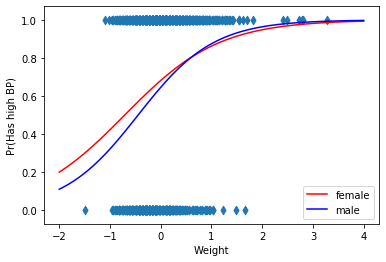

In [115]:
plt.scatter(fram.sFRW, fram.HIGH_BP, marker="d")
X = np.linspace(-2, 4, 100)
p = fit.params
print(p)
plt.plot(X, logistic(p.sFRW*X + p.Intercept), color="red", label="female")
plt.plot(X, logistic(X*(p['sFRW'] + p["SEX[T.male]:sFRW"]) + p["SEX[T.male]"] + p.Intercept), color="blue", label="male")
plt.xlabel("Weight")
plt.ylabel("Pr(Has high BP)")
plt.legend();

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [243]:
# exercise 10
# Put your solution here!
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + SEX:sAGE", data=fram,family=sm.families.Binomial()).fit()
print(fit.summary())

error_rate = np.mean( ((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP) )
print(error_rate)
fit.params

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.51
Date:                Wed, 22 Jul 2020   Deviance:                       1691.0
Time:                        22:04:22   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8079      0.084  

Intercept           0.807929
SEX[T.male]        -0.198273
sFRW                1.019648
SEX[T.male]:sFRW    0.375389
sAGE                0.600800
SEX[T.male]:sAGE   -0.572700
sAGE:sFRW          -0.758808
dtype: float64

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

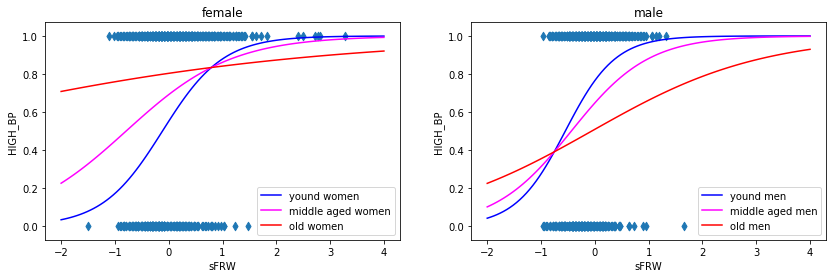

In [247]:
# exercise 11
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!
p = fit.params

fig, ax = plt.subplots(1,2, subplot_kw={"xlabel": "sFRW", "ylabel": "HIGH_BP"},figsize=(14, 4))

ax[0].scatter(fram.sFRW[(fram.SEX=="female")], fram.HIGH_BP[(fram.SEX=="female")], marker="d")
X=np.linspace(-2, 4, 100)
ax[0].plot(X, logistic(X*(p.sFRW - p['sAGE:sFRW']) + p.Intercept-p['sAGE']), color="blue", label="yound women")
ax[0].plot(X, logistic(X*p.sFRW + p.Intercept), color="magenta", label="middle aged women")
ax[0].plot(X, logistic(X* (p.sFRW + p['sAGE:sFRW']) + p.Intercept+p['sAGE']), color="red", label="old women")
ax[0].set_title("female")
ax[0].legend();

ax[1].scatter(fram.sFRW[(fram.SEX=="male")], fram.HIGH_BP[(fram.SEX=="male")], marker="d")
X=np.linspace(-2, 4, 100)
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] -p['sAGE:sFRW']) + p["SEX[T.male]"] + p.Intercept - p['SEX[T.male]:sAGE']), color="blue", label="yound men")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]) + p["SEX[T.male]"] + p.Intercept), color="magenta", label="middle aged men")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"] +p['sAGE:sFRW']) + p["SEX[T.male]"] + p.Intercept + p['SEX[T.male]:sAGE']), color="red", label="old men")
ax[1].set_title("male")
ax[1].legend();

#plt.plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]) + p["SEX[T.male]"] + p.Intercept), color="blue", label="male")
#plt.legend();


How do the models with different ages and genders differ from each other?

***
Your solution here.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [158]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction=0.8):
    train=df.sample(frac=train_fraction)
    test=df.drop(train.index)
    return train, test

In [159]:
orig = pd.DataFrame(np.random.randn(10,10))
x = train_test_split(orig, train_fraction=0.8)
x[0].shape, x[1].shape

((8, 10), (2, 10))

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [147]:
np.random.seed(1)
train_test_split(fram, train_fraction=0.8)
print(len(train), len(test))

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=train,family=sm.families.Binomial()).fit()
print(fit.summary())
pred = fit.predict(test, transform=True)
#print(pred.describe())
#print("Min:", pred.min())
#print("Max:", pred.max())
error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | ((pred > 0.5) & (test.HIGH_BP==0)))
print(error_rate, 1 - test.HIGH_BP.mean())

1115 279
                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1115
Model:                            GLM   Df Residuals:                     1111
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -689.76
Date:                Wed, 22 Jul 2020   Deviance:                       1379.5
Time:                        17:13:31   Pearson chi2:                 1.11e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8008    

In [157]:
# exercise 13
# Put your solution here!
error_model=[]
error_null=[]
np.random.seed(1)
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + SEX:sAGE", data=train,family=sm.families.Binomial()).fit()
    pred = fit.predict(test, transform=True)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())

print(np.mean(error_model))
pd.Series(error_model).mean(), pd.Series(error_model).max(), pd.Series(error_model).min(), pd.Series(error_null).mean() 

0.3311827956989247


(0.3311827956989248,
 0.3870967741935484,
 0.27956989247311825,
 0.3488530465949821)

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [5]:
# exercise 14
# Put your solution here!
fram["hasCHD"] = (fram.CHD > 0) 
fram.hasCHD = fram.hasCHD.map(int)
fram.hasCHD.head()

print(fram.hasCHD.value_counts())
print(fram.hasCHD.mean())

0    1087
1     307
Name: hasCHD, dtype: int64
0.22022955523672882


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [6]:
# exercise 15
# Put your solution here!
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", data=fram,family=sm.families.Binomial()).fit()
print(fit.summary())
p = fit.params
error_rate = np.mean( ((fit.fittedvalues < 0.5) & fram.hasCHD) | ((fit.fittedvalues > 0.5) & ~fram.hasCHD) )
print(error_rate)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Thu, 23 Jul 2020   Deviance:                       1442.4
Time:                        08:34:28   Pearson chi2:                 1.39e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.0

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

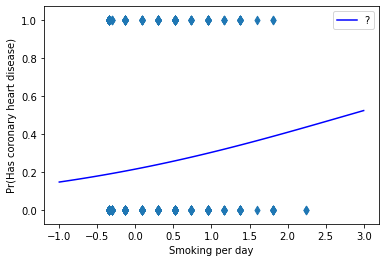

In [7]:
# exercise 16
# Put your solution here!

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

X = np.linspace(-1, 3, 100)
plt.scatter(fram.sCIG, fram.hasCHD, marker ='d')
#plt.plot(X, logistic(X*(p['sCIG'] + p['sCHOL:sCIG']) + p['sCHOL'] + p['sFRW'] + p['sCHOL:sFRW'] + p.Intercept), color="red", label="???")
plt.plot(X, logistic(X*(p['sCIG'] ) + p.Intercept), color="blue", label='?')

plt.xlabel("Smoking per day")
plt.ylabel("Pr(Has coronary heart disease)")
plt.legend();



Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Your solution here.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [28]:
# exercise 17
# Put your solution here!
chol = (200 - fram.CHOL.mean())/(2*fram.CHOL.std())
weight = (100 - fram.FRW.mean())/(2*fram.FRW.std())
smoke = (17 - fram.CIG.mean())/(2*fram.CIG.std())

point = {'sCHOL':chol, 'sFRW':weight, 'sCIG':smoke }

prediction = fit.predict(pd.DataFrame([list(point.values())], columns = ['sCHOL','sFRW', 'sCIG']))
predicted = prediction.values[0]
predicted

#data = {"x1" : x1, "y" : y}
#res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()
#res.predict(exog=dict(x1=x1n))
#x = fram.CHOL == 200
#x[x == True].index[0]
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html

0.21616166025041014